In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,NaN,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,NaN
5,female,group B,associate's degree,standard,none,71.0,83.0,78.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
8,male,group D,high school,free/reduced,completed,NaN,64.0,67.0
9,female,group B,high school,free/reduced,none,38.0,60.0,50.0


In [4]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86.0,81.0,75.0
991,female,group B,some high school,standard,completed,65.0,82.0,78.0
992,female,group D,associate's degree,free/reduced,none,55.0,76.0,76.0
993,female,group D,bachelor's degree,free/reduced,none,62.0,72.0,74.0
994,male,group A,high school,standard,none,63.0,63.0,62.0
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [5]:
df.describe()

,math score,reading score,writing score
count,997.000000,997.000000,996.000000
mean,66.087262,69.198596,68.051205
std,15.178900,14.573546,15.214988
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   997 non-null    float64
 6   reading score                997 non-null    float64
 7   writing score                996 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

In [8]:
df.size

8000

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     3
reading score                  3
writing score                  4
dtype: int64

In [10]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

## Treating null values

In [11]:
df1 = df.copy()

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     3
reading score                  3
writing score                  4
dtype: int64

In [13]:
df1.dropna(inplace=True)

In [14]:
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.fillna(df['writing score'].mean(), inplace=True)

In [16]:
df.fillna(df['reading score'].median(), inplace=True)

In [17]:
df.fillna(df['math score'].mode().iloc[0], inplace=True)

In [18]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
df.fillna(method='bfill')
df.fillna(method='ffill')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,68.051205,74.000000
1,female,group C,some college,standard,completed,69.0,90.000000,88.000000
2,female,group B,master's degree,standard,none,90.0,95.000000,93.000000
3,male,group A,associate's degree,free/reduced,none,47.0,57.000000,44.000000
4,male,group C,some college,standard,none,76.0,78.000000,68.051205
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.000000,95.000000
996,male,group C,high school,free/reduced,none,62.0,55.000000,55.000000
997,female,group C,high school,free/reduced,completed,59.0,71.000000,65.000000
998,female,group D,some college,standard,completed,68.0,78.000000,77.000000


## Converting data types

In [20]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,68.051205,74.000000
1,female,group C,some college,standard,completed,69.0,90.000000,88.000000
2,female,group B,master's degree,standard,none,90.0,95.000000,93.000000
3,male,group A,associate's degree,free/reduced,none,47.0,57.000000,44.000000
4,male,group C,some college,standard,none,76.0,78.000000,68.051205


In [22]:
df['parental level of education'] = df['parental level of education'].astype(str).dtypes

In [23]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [24]:
df.drop_duplicates(keep='first')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,object,standard,none,72.0,68.051205,74.000000
1,female,group C,object,standard,completed,69.0,90.000000,88.000000
2,female,group B,object,standard,none,90.0,95.000000,93.000000
3,male,group A,object,free/reduced,none,47.0,57.000000,44.000000
4,male,group C,object,standard,none,76.0,78.000000,68.051205
...,...,...,...,...,...,...,...,...
995,female,group E,object,standard,completed,88.0,99.000000,95.000000
996,male,group C,object,free/reduced,none,62.0,55.000000,55.000000
997,female,group C,object,free/reduced,completed,59.0,71.000000,65.000000
998,female,group D,object,standard,completed,68.0,78.000000,77.000000


In [25]:
(df['math score'] > 50).sum()

850

In [26]:
(df['gender'] == 'male').value_counts()

gender
False    518
True     482
Name: count, dtype: int64

In [27]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

## Converting categorical to quantitative

In [28]:
# 1. Using replace method


In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,object,standard,none,72.0,68.051205,74.000000
1,female,group C,object,standard,completed,69.0,90.000000,88.000000
2,female,group B,object,standard,none,90.0,95.000000,93.000000
3,male,group A,object,free/reduced,none,47.0,57.000000,44.000000
4,male,group C,object,standard,none,76.0,78.000000,68.051205


In [30]:
df1 = df.copy()

genders = df1['gender'].unique()
df1['gender'].replace(genders, [0,1], inplace=True)
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,object,standard,none,72.0,68.051205,74.000000
1,0,group C,object,standard,completed,69.0,90.000000,88.000000
2,0,group B,object,standard,none,90.0,95.000000,93.000000
3,1,group A,object,free/reduced,none,47.0,57.000000,44.000000
4,1,group C,object,standard,none,76.0,78.000000,68.051205


In [31]:
# 2. Using get_dummies method

In [32]:
df1 = df.copy()

race_dummies = pd.get_dummies(df1['race/ethnicity'], dtype=int)
race_dummies

,group A,group B,group C,group D,group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,1,0,0
997,0,0,1,0,0
998,0,0,0,1,0


In [33]:
df1=pd.concat([df1, race_dummies], axis='columns')

In [34]:
df1.drop(['race/ethnicity'], axis='columns', inplace=True)

In [35]:
df1.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
0,female,object,standard,none,72.000000,68.051205,74.000000,0,1,0,0,0
1,female,object,standard,completed,69.000000,90.000000,88.000000,0,0,1,0,0
2,female,object,standard,none,90.000000,95.000000,93.000000,0,1,0,0,0
3,male,object,free/reduced,none,47.000000,57.000000,44.000000,1,0,0,0,0
4,male,object,standard,none,76.000000,78.000000,68.051205,0,0,1,0,0
5,female,object,standard,none,71.000000,83.000000,78.000000,0,1,0,0,0
6,female,object,standard,completed,88.000000,95.000000,92.000000,0,1,0,0,0
7,male,object,free/reduced,none,40.000000,43.000000,39.000000,0,1,0,0,0
8,male,object,free/reduced,completed,68.051205,64.000000,67.000000,0,0,0,1,0
9,female,object,free/reduced,none,38.000000,60.000000,50.000000,0,1,0,0,0


In [36]:
# 3. Using map function

In [37]:
df1 = df.copy()

df1['gender'] = df1['gender'].map({'female': 0, 'male': 1})
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,object,standard,none,72.0,68.051205,74.000000
1,0,group C,object,standard,completed,69.0,90.000000,88.000000
2,0,group B,object,standard,none,90.0,95.000000,93.000000
3,1,group A,object,free/reduced,none,47.0,57.000000,44.000000
4,1,group C,object,standard,none,76.0,78.000000,68.051205


In [38]:
# 4. Using LabelEncoder

In [39]:
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

In [40]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,object,standard,none,72.0,68.051205,74.000000
1,female,2,object,standard,completed,69.0,90.000000,88.000000
2,female,1,object,standard,none,90.0,95.000000,93.000000
3,male,0,object,free/reduced,none,47.0,57.000000,44.000000
4,male,2,object,standard,none,76.0,78.000000,68.051205


## Data Transformations

In [41]:
df1 = df.copy()

In [42]:
def grade(x):
    if x >= 90:
        return 'A+'
    elif x >= 80 and x < 90:
        return 'A'
    elif x >= 70 and x < 80:
        return 'B'
    elif x >= 60 and x < 70:
        return 'C'
    elif x >= 50 and x < 60:
        return 'D'
    else:
        return 'E'

In [43]:
df1['grade'] = (df1['reading score'] + df1['writing score'] + df1['math score'])/3

In [44]:
df1['grade'] = df1['grade'].apply(grade)

In [45]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,grade
0,female,group B,object,standard,none,72.0,68.051205,74.000000,B
1,female,group C,object,standard,completed,69.0,90.000000,88.000000,A
2,female,group B,object,standard,none,90.0,95.000000,93.000000,A+
3,male,group A,object,free/reduced,none,47.0,57.000000,44.000000,E
4,male,group C,object,standard,none,76.0,78.000000,68.051205,B


In [46]:
df1.sort_values(by=['grade', 'writing score'], ascending=[True, False])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,grade
110,female,group D,object,free/reduced,completed,77.0,89.0,98.0,A
652,female,group D,object,standard,completed,85.0,86.0,98.0,A
941,female,group D,object,standard,none,78.0,91.0,96.0,A
347,female,group C,object,standard,completed,77.0,94.0,95.0,A
397,female,group C,object,standard,none,85.0,89.0,95.0,A
...,...,...,...,...,...,...,...,...,...
980,female,group B,object,free/reduced,none,8.0,24.0,23.0,E
76,male,group E,object,standard,none,30.0,26.0,22.0,E
327,male,group A,object,free/reduced,none,28.0,23.0,19.0,E
596,male,group B,object,free/reduced,none,30.0,24.0,15.0,E


<Axes: xlabel='grade', ylabel='Count'>

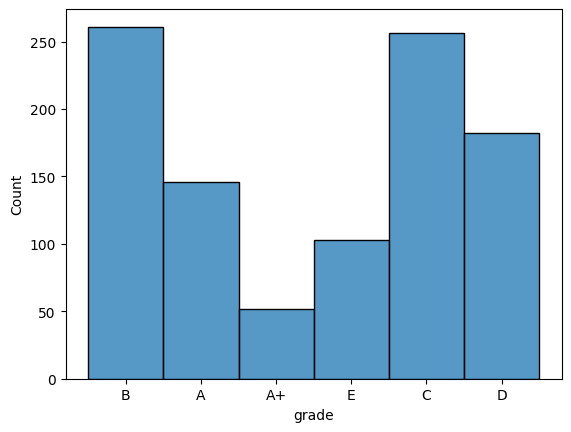

In [47]:
sns.histplot(x=df1['grade'])

## Normalising Data and Skewness Reduction

In [48]:
df1 = df.copy()

<Axes: ylabel='Density'>

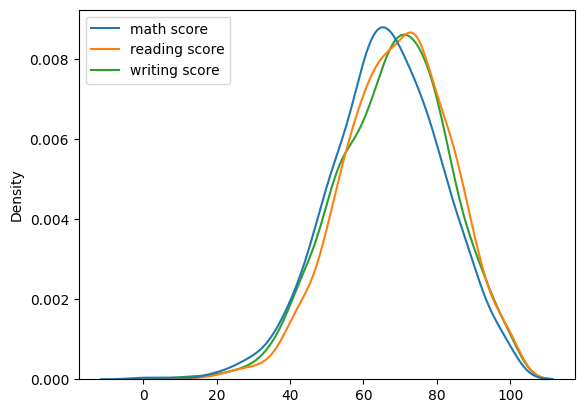

In [49]:
sns.kdeplot(df1)

In [50]:
df1.dropna()
print("Math Score Skewness: ", df1['math score'].skew())
print("Writing Score Skewness: ", df1['writing score'].skew())
print("Reading Score Skewness: ", df1['reading score'].skew())

Math Score Skewness:  -0.2804490816494271
Writing Score Skewness:  -0.28876151404844286
Reading Score Skewness:  -0.2504324466682552


In [51]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,object,standard,none,72.0,68.051205,74.000000
1,female,group C,object,standard,completed,69.0,90.000000,88.000000
2,female,group B,object,standard,none,90.0,95.000000,93.000000
3,male,group A,object,free/reduced,none,47.0,57.000000,44.000000
4,male,group C,object,standard,none,76.0,78.000000,68.051205


In [52]:
[df1['reading score'], df1['writing score'], df1['math score']] = np.log10([df1['reading score'], df1['writing score'], df1['math score']])

/tmp/ipykernel_29502/2419289654.py:1: RuntimeWarning: divide by zero encountered in log10
  [df1['reading score'], df1['writing score'], df1['math score']] = np.log10([df1['reading score'], df1['writing score'], df1['math score']])


In [53]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,object,standard,none,1.857332,1.832836,1.869232
1,female,group C,object,standard,completed,1.838849,1.954243,1.944483
2,female,group B,object,standard,none,1.954243,1.977724,1.968483
3,male,group A,object,free/reduced,none,1.672098,1.755875,1.643453
4,male,group C,object,standard,none,1.880814,1.892095,1.832836


<Axes: ylabel='Density'>

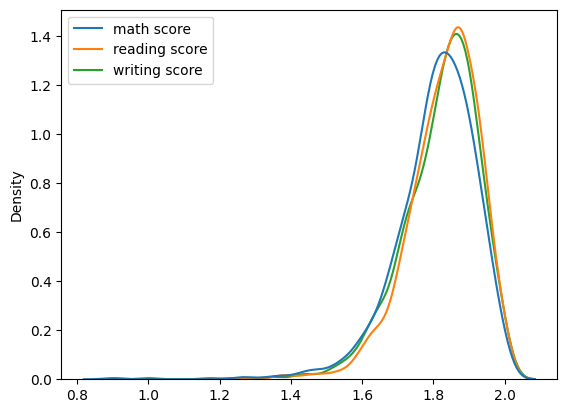

In [54]:
sns.kdeplot(df1)

In [55]:
print("Math Score Skewness: ", df1['math score'].skew())
print("Writing Score Skewness: ", df1['writing score'].skew())
print("Reading Score Skewness: ", df1['reading score'].skew())


Math Score Skewness:  nan
Writing Score Skewness:  -1.4366312672129677
Reading Score Skewness:  -1.1208077826406464


# Assignment 4

In [56]:
df = pd.read_csv('boston_housing.csv')

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identifying Outliers

In [58]:
# 1. Using boxplot

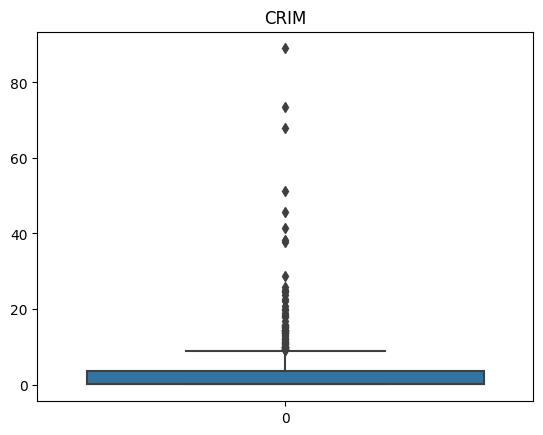

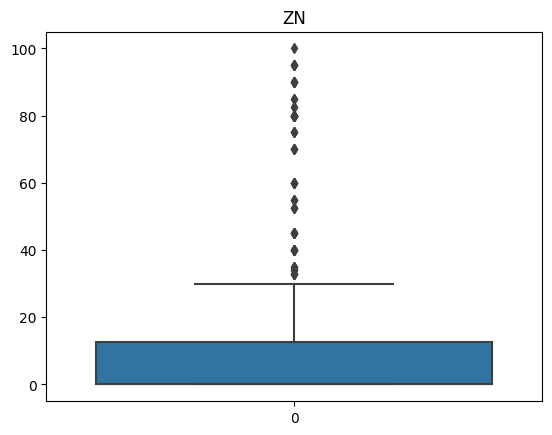

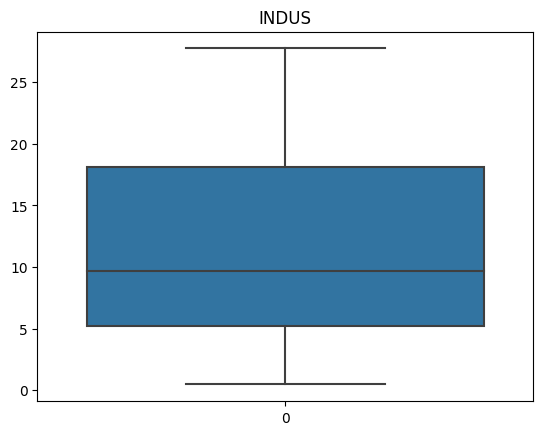

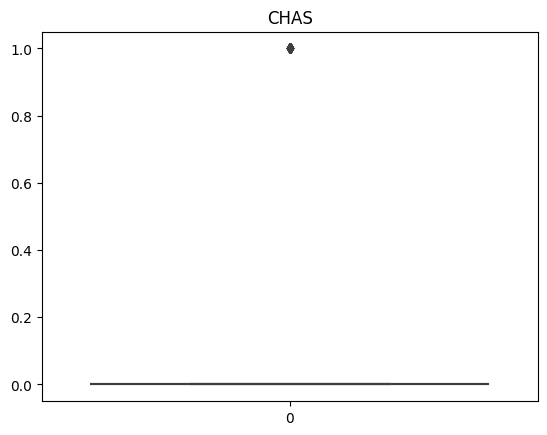

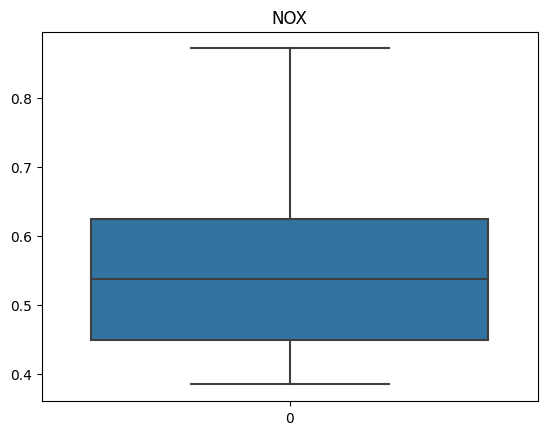

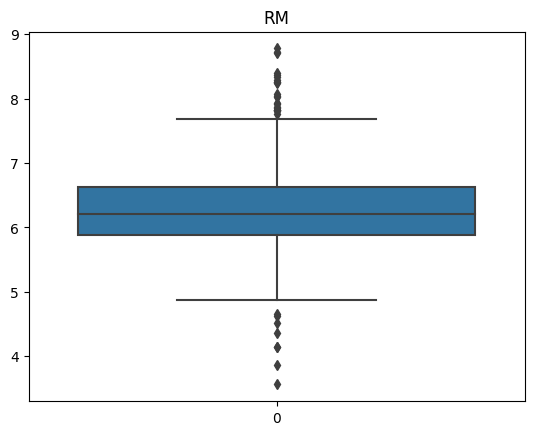

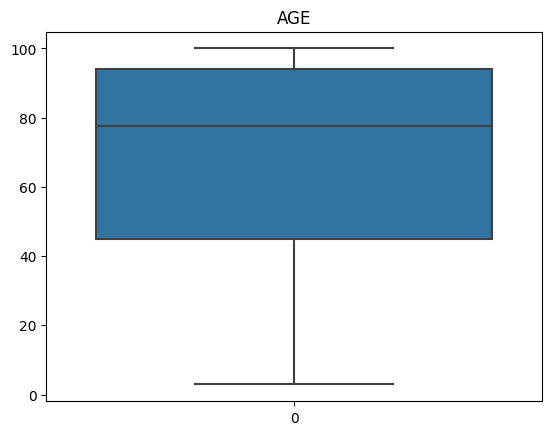

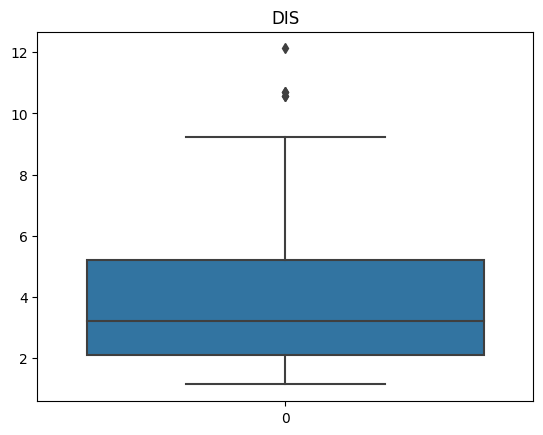

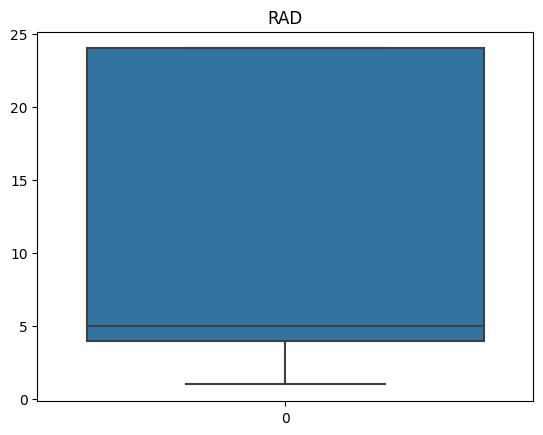

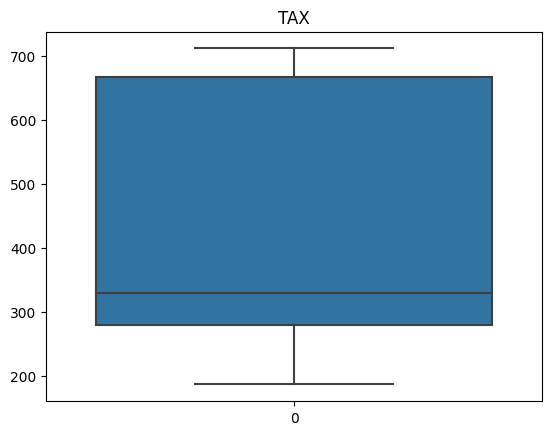

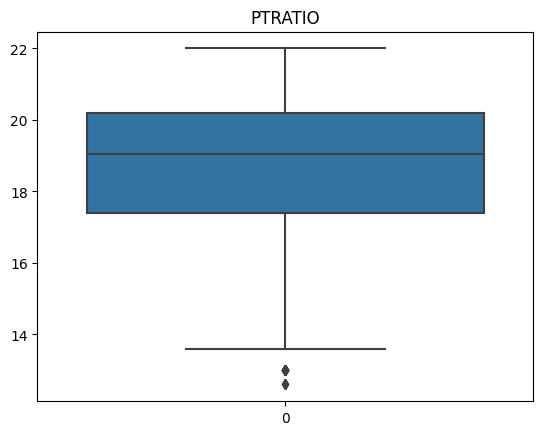

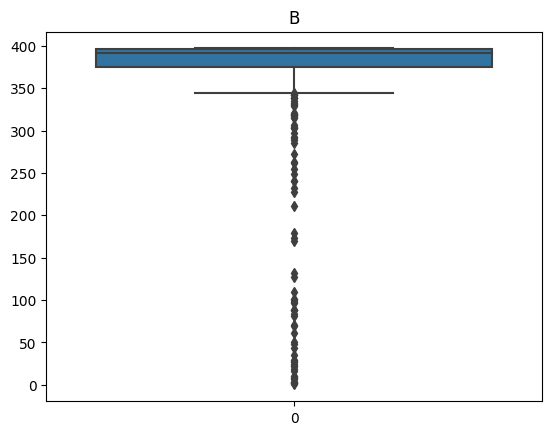

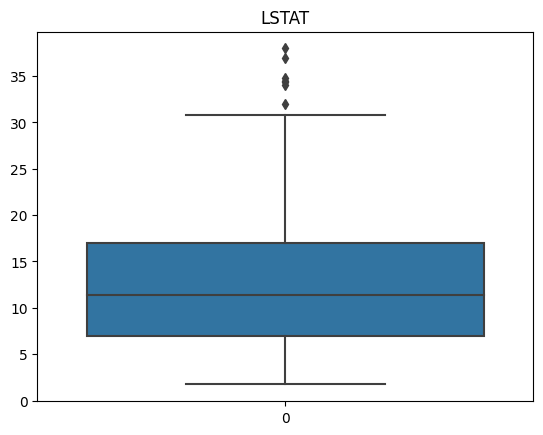

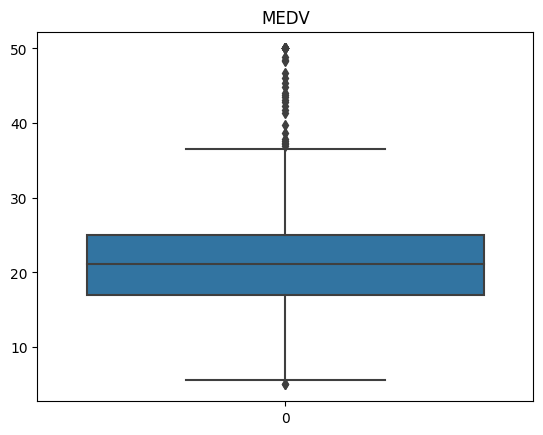

<Figure size 640x480 with 0 Axes>

In [59]:
for cols in df.columns:
    sns.boxplot(df[cols])
    plt.title(cols)
    plt.figure()

<Axes: xlabel='RM'>

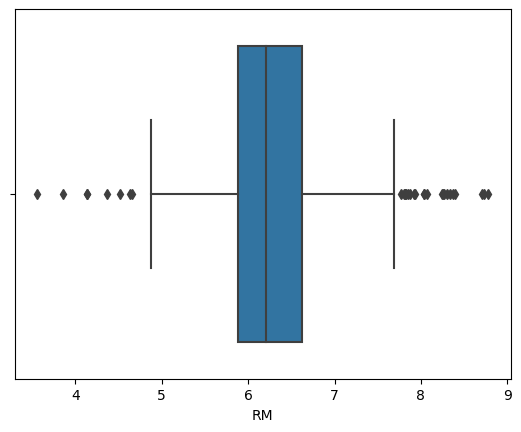

In [60]:
sns.boxplot(x=df['RM'])

In [61]:
# 2. Using z score

In [62]:
meann = df['RM'].mean()
stdd = df['RM'].std()
thres = 3
outliers = []

outliers = [x for x in df['RM'] if np.abs((x-meann)/stdd) > thres]

print("Outliers: ", outliers)

Outliers:  [8.725, 8.704, 8.398, 8.78, 3.561, 3.863, 4.138, 4.138]


In [63]:
# 3. Using IQR

In [64]:
df1 = sorted(df['RM'])
q1 = np.percentile(df1, 25)
q3 = np.percentile(df1, 75)
iqr = q3-q1
low = iqr - 1.5*iqr
high = iqr + 1.5*iqr

outliers = [x for x in df['RM'] if x > high or x < low]
print("Outliers: ", outliers)

Outliers:  [6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.012, 6.172, 5.631, 6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99, 5.456, 5.727, 5.57, 5.965, 6.142, 5.813, 5.924, 5.599, 5.813, 6.047, 6.495, 6.674, 5.713, 6.072, 5.95, 5.701, 6.096, 5.933, 5.841, 5.85, 5.966, 6.595, 7.024, 6.77, 6.169, 6.211, 6.069, 5.682, 5.786, 6.03, 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456, 6.762, 7.104, 6.29, 5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273, 6.286, 6.279, 6.14, 6.232, 5.874, 6.727, 6.619, 6.302, 6.167, 6.389, 6.63, 6.015, 6.121, 7.007, 7.079, 6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82, 7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176, 6.021, 5.872, 5.731, 5.87, 6.004, 5.961, 5.856, 5.879, 5.986, 5.613, 5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335, 5.942, 6.454, 5.857, 6.151, 6.174, 5.019, 5.403,

## Treating Outliers

In [65]:
# 1. Min Max Scaling

<Axes: xlabel='RM', ylabel='Count'>

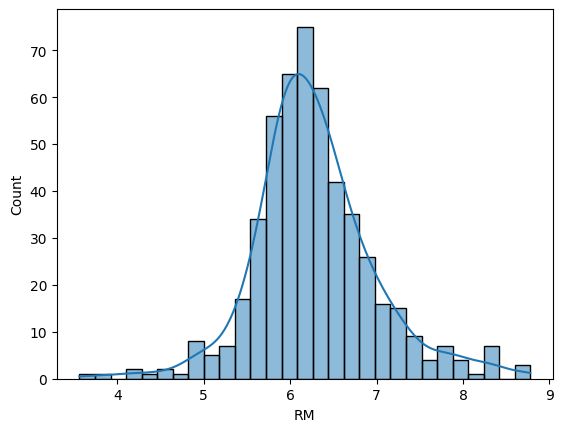

In [66]:
sns.histplot(df['RM'], kde=True)

In [67]:
minn = df['RM'].min()
maxx = df['RM'].max()
df_norm = [(x-minn)/(maxx-minn) for x in df['RM']]
df['RM Norm'] = df_norm

In [68]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM Norm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.577505
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.547998
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.694386
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.658555
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.687105


<Axes: xlabel='RM Norm', ylabel='Count'>

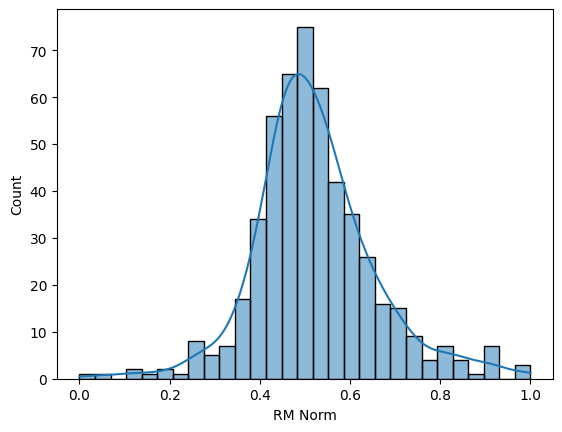

In [69]:
sns.histplot(df['RM Norm'], kde=True)

In [70]:
# 2. Using Z Score Scaling

In [71]:
meann = df['RM'].mean()
stdd = df['RM'].std()
df_std = [(x-meann)/stdd for x in df['RM']]
df['RM Scaled'] = df_std

In [72]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM Norm,RM Scaled
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.577505,0.413263
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.547998,0.194082
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.694386,1.281446
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.658555,1.015298
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.687105,1.227362


<Axes: xlabel='RM Scaled', ylabel='Count'>

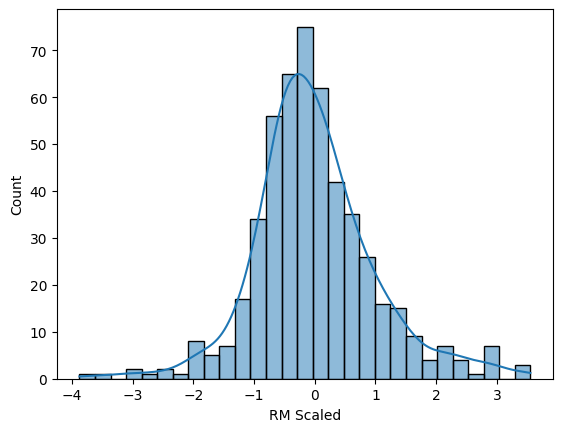

In [73]:
sns.histplot(df['RM Scaled'], kde=True)

<Axes: >

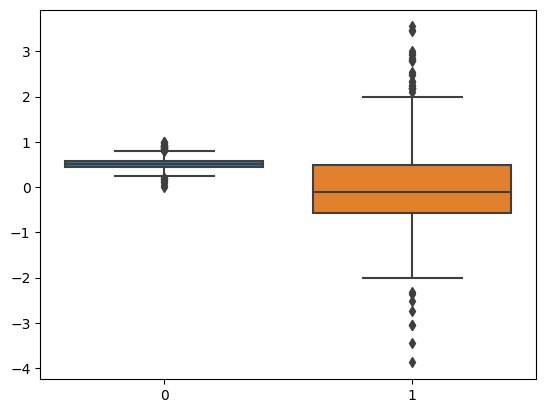

In [74]:
sns.boxplot([df['RM Norm'], df['RM Scaled']])

In [87]:
# 3. Trimming Outliers

df1 = df.copy()
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM Norm,RM Scaled
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.577505,0.413263
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.547998,0.194082
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.694386,1.281446
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.658555,1.015298
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.687105,1.227362


<Axes: xlabel='RM'>

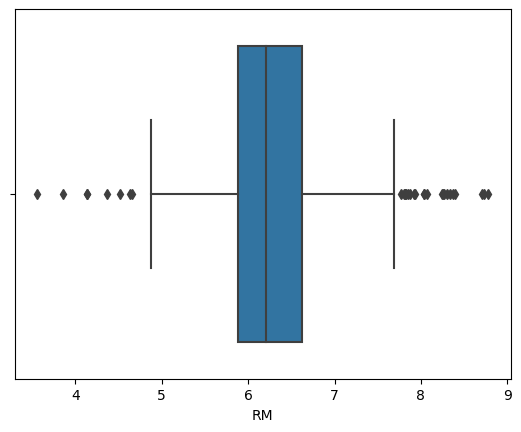

In [88]:
sns.boxplot(x=df1['RM'])

In [89]:
df1 = df1[~df1['RM'].isin(outliers)]

In [90]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM Norm,RM Scaled


<Axes: xlabel='RM'>

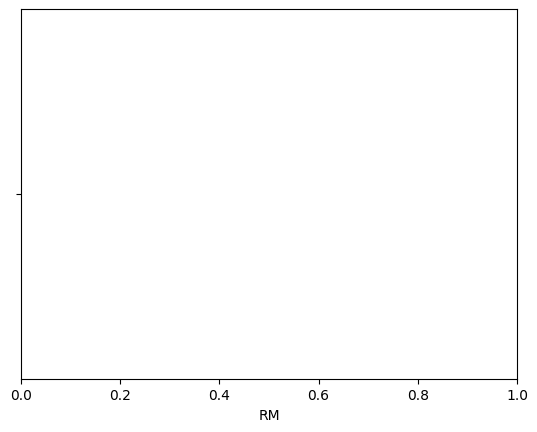

In [82]:
sns.boxplot(x=df1['RM'])

In [91]:
# 4. Quantile based flooring

df1 = df.copy() 
ninety = np.percentile(df1['RM'], 90)
ten = np.percentile(df1['RM'], 10)

df1['RM'] = np.where(df1['RM'] > ninety, ninety, df1['RM'])
df1['RM'] = np.where(df1['RM'] < ten, ten, df1['RM'])

<Axes: xlabel='RM'>

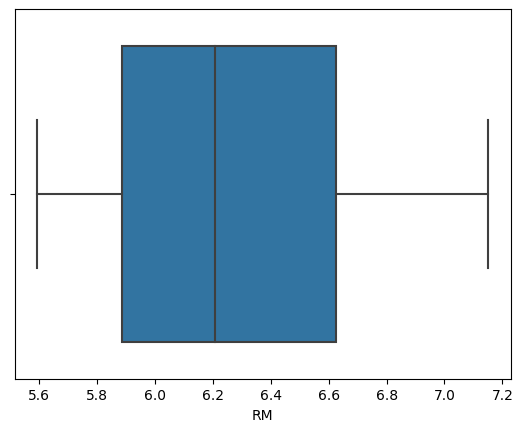

In [92]:
sns.boxplot(x=df1['RM'])

In [97]:
# 5. Mean/Median Imputation

df1 = df.copy()
mean = df['RM'].mean()

df1['RM'] = np.where(df1['RM'].isin(outliers), mean, df1['RM'])
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM Norm,RM Scaled
0,0.00632,18.0,2.31,0,0.538,6.284634,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.577505,0.413263
1,0.02731,0.0,7.07,0,0.469,6.284634,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.547998,0.194082
2,0.02729,0.0,7.07,0,0.469,6.284634,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.694386,1.281446
3,0.03237,0.0,2.18,0,0.458,6.284634,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.658555,1.015298
4,0.06905,0.0,2.18,0,0.458,6.284634,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.687105,1.227362


<Axes: xlabel='RM'>

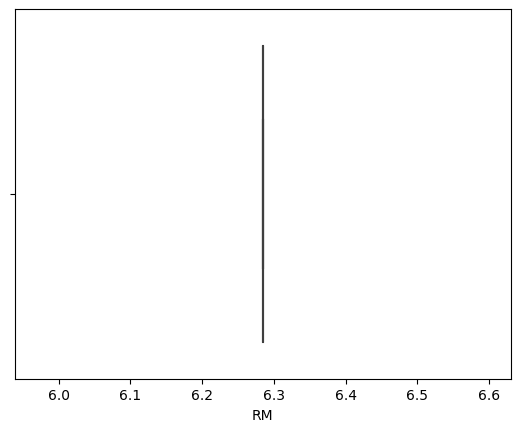

In [96]:
sns.boxplot(x=df1['RM'])

# Assignment 5

In [111]:
df = pd.read_csv('employee_data_03.csv')

In [112]:
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [113]:
df.drop(['Unnamed: 0','id'], axis='columns', inplace=True)

In [114]:
df.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


In [115]:
# Converting numerical to categorical

In [116]:
labels = ['young', 'teenage', 'adult']

df['Age'] = pd.cut(df['age'], bins=3, labels=labels)
df.head()

,groups,age,healthy_eating,active_lifestyle,salary,Age
0,A,36,5,5,2297,teenage
1,A,55,3,5,1134,adult
2,A,61,8,1,4969,adult
3,O,29,3,6,902,young
4,O,34,6,2,3574,teenage


In [117]:
# Grouping based on just Age

In [118]:
group1 = df.groupby('Age')

In [119]:
group1.describe()

age                                                      
         count       mean       std   min   25%   50%   75%   max   
Age                                                                 
young    342.0  25.836257  4.802501  18.0  22.0  26.0  30.0  33.0  \
teenage  311.0  41.061093  4.320932  34.0  37.0  41.0  45.0  48.0   
adult    347.0  56.337176  4.554598  49.0  52.0  56.0  60.0  64.0   

        healthy_eating            ... active_lifestyle       salary   
                 count      mean  ...              75%   max  count   
Age                               ...                                 
young            342.0  4.941520  ...              6.0  10.0  342.0  \
teenage          311.0  4.990354  ...              7.0  10.0  311.0   
adult            347.0  4.904899  ...              7.0  10.0  347.0   

                                                                          
                mean          std    min     25%     50%     75%     max  
Age                                                                       
young    2310.687135  1103.951779  553.0  1369.0  2179.0  3110.0  5435.0  
teenage  2219.189711  1089.751673  553.0  1252.0  2065.0  2878.0  5550.0  
adult    2152.847262  1044.724057  553.0  1252.0  2065.0  2878.0  5435.0  

[3 rows x 32 columns]

In [120]:
young = group1.get_group('young')
teenage = group1.get_group('teenage')
adult = group1.get_group('adult')

In [121]:
young.head(10)

,groups,age,healthy_eating,active_lifestyle,salary,Age
3,O,29,3,6,902,young
9,A,31,4,8,1020,young
16,A,33,3,5,1134,young
19,O,32,7,6,3228,young
21,O,26,1,6,1360,young
29,O,20,8,6,3809,young
33,A,18,4,6,1484,young
34,A,29,5,7,1833,young
37,O,22,3,5,1134,young
46,AB,24,4,3,2179,young


In [122]:
teenage.head(10)

,groups,age,healthy_eating,active_lifestyle,salary,Age
0,A,36,5,5,2297,teenage
4,O,34,6,2,3574,teenage
5,O,42,5,3,2761,teenage
7,B,41,8,6,3809,teenage
8,A,47,5,6,2065,teenage
10,A,47,6,9,1950,teenage
11,O,40,7,1,4387,teenage
12,O,41,3,2,1830,teenage
13,O,46,6,8,2182,teenage
17,A,41,4,8,1020,teenage


In [123]:
adult.head(10)

,groups,age,healthy_eating,active_lifestyle,salary,Age
1,A,55,3,5,1134,adult
2,A,61,8,1,4969,adult
6,AB,53,4,6,1484,adult
14,AB,51,7,5,3460,adult
15,B,57,3,8,662,adult
20,O,57,7,6,3228,adult
22,AB,59,7,5,3460,adult
23,B,55,6,4,3110,adult
24,A,51,5,8,1601,adult
25,A,63,6,7,2414,adult


In [125]:
young.mean(numeric_only=True)

age                   25.836257
healthy_eating         4.941520
active_lifestyle       5.254386
salary              2310.687135
dtype: float64

In [126]:
teenage.median(numeric_only=True)

age                   41.0
healthy_eating         5.0
active_lifestyle       6.0
salary              2065.0
dtype: float64

In [127]:
adult.mode()

,groups,age,healthy_eating,active_lifestyle,salary,Age
0,A,62,5,7,1252,adult


In [128]:
young.max(numeric_only=True)

age                   33
healthy_eating        10
active_lifestyle      10
salary              5435
dtype: int64

In [129]:
teenage.min(numeric_only=True)

age                  34
healthy_eating        0
active_lifestyle      0
salary              553
dtype: int64

In [130]:
adult.std(numeric_only=True)

age                    4.554598
healthy_eating         1.961966
active_lifestyle       2.031514
salary              1044.724057
dtype: float64

In [131]:
df.head()

,groups,age,healthy_eating,active_lifestyle,salary,Age
0,A,36,5,5,2297,teenage
1,A,55,3,5,1134,adult
2,A,61,8,1,4969,adult
3,O,29,3,6,902,young
4,O,34,6,2,3574,teenage


In [132]:
# Grouping using Age as categorical and salary as quantitative variable


In [133]:
group2 = df.groupby('Age')['salary']

In [135]:
group2.describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
young,342.0,2310.687135,1103.951779,553.0,1369.0,2179.0,3110.0,5435.0
teenage,311.0,2219.189711,1089.751673,553.0,1252.0,2065.0,2878.0,5550.0
adult,347.0,2152.847262,1044.724057,553.0,1252.0,2065.0,2878.0,5435.0


In [136]:
young = group1.get_group('young')
teenage = group1.get_group('teenage')
adult = group1.get_group('adult')

In [139]:
young

3       902
9      1020
16     1134
19     3228
21     1360
       ... 
986    2414
990    1366
992    3342
995    2996
996     667
Name: salary, Length: 342, dtype: int64

In [140]:
teenage.head(10)

,groups,age,healthy_eating,active_lifestyle,salary,Age
0,A,36,5,5,2297,teenage
4,O,34,6,2,3574,teenage
5,O,42,5,3,2761,teenage
7,B,41,8,6,3809,teenage
8,A,47,5,6,2065,teenage
10,A,47,6,9,1950,teenage
11,O,40,7,1,4387,teenage
12,O,41,3,2,1830,teenage
13,O,46,6,8,2182,teenage
17,A,41,4,8,1020,teenage


In [141]:
adult.tail(10)

,groups,age,healthy_eating,active_lifestyle,salary,Age
980,O,58,5,5,2297,adult
982,AB,50,9,5,4622,adult
985,A,52,4,3,2179,adult
987,O,50,5,5,2297,adult
988,O,60,4,6,1484,adult
993,A,56,5,5,2297,adult
994,A,52,5,7,1833,adult
997,O,49,9,7,4158,adult
998,AB,56,6,7,2414,adult
999,B,64,4,9,788,adult


In [142]:
# Grouping using 2 categorical variable

In [143]:
group3 = df.groupby(['Age','groups'])['salary']

In [144]:
group3.describe()

count         mean          std    min      25%     50%   
Age     groups                                                            
young   A       132.0  2210.075758  1099.692453  553.0  1364.50  2063.5  \
        AB       37.0  2211.675676  1155.731155  553.0  1252.00  2065.0   
        B        38.0  2635.842105  1076.270400  785.0  1629.75  2646.0   
        O       135.0  2344.674074  1093.881135  553.0  1426.50  2297.0   
teenage A       116.0  2227.474138  1035.796744  662.0  1368.25  2065.0   
        AB       35.0  2224.514286  1156.278446  670.0  1422.00  1950.0   
        B        40.0  2284.425000  1256.273486  553.0  1134.00  2239.5   
        O       120.0  2187.883333  1074.759236  553.0  1249.75  2065.0   
adult   A       127.0  2094.220472   974.726506  553.0  1252.00  2065.0   
        AB       53.0  2321.150943  1253.464098  667.0  1252.00  2174.0   
        B        47.0  1862.936170  1073.797475  553.0   957.00  1716.0   
        O       120.0  2254.108333   987.613181  662.0  1369.00  2297.0   

                    75%     max  
Age     groups                   
young   A       2909.00  5435.0  
        AB      2878.00  4854.0  
        B       3574.00  4622.0  
        O       3170.50  5435.0  
teenage A       2792.50  4854.0  
        AB      2937.00  4972.0  
        B       3199.75  5550.0  
        O       2878.00  4508.0  
adult   A       2762.50  4969.0  
        AB      3228.00  5435.0  
        B       2470.00  4622.0  
        O       3024.50  4622.0

In [150]:
youngA = group3.get_group(('young','A'))

In [151]:
young.head(10)

9     1020
16    1134
33    1484
34    1833
58    4390
66    1366
72    3225
74    2414
80    1830
81    2993
Name: salary, dtype: int64